In [0]:
!pip install -q keras
#installation of keras 

In [2]:
#Read the file from drive 
import pandas as pd 
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
#DATA PRE PROCESSING 
#STEP 1: 
#CHECK NULL INFO 
#now we came to know surname geography and gender are of Object type 
print(dataset.isnull().sum(axis=0))

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [0]:
#DATA PREPARATION 
#As we know Rownumber ,customer ID and surname not going to make any impact on prediction 
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
x=pd.get_dummies(x,drop_first=True)



In [0]:
#SPLIT DATA INTO TRAIN AND TEST 
#splitting the dataset into the training set and test set 
x=x.values
y=y.values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42 )

In [0]:
#FEATURE SCALING 
#Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [0]:
#LETS MAKE ANN
import tensorflow.keras 
import tensorflow.keras 
#Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
from tensorflow.keras.models import Sequential
#The Sequential model is a linear stack of layers.
from tensorflow.keras.layers import Dense
#Dense implements the operation: output = activation(dot(input, kernel) + bias) 
#where activation is the element-wise activation function passed as the activation argument, 
#kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
#Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

In [8]:
classifier=Sequential()
#Adding input layer
classifier.add(Dense(units=10, input_shape=(11,),kernel_initializer='he_uniform'))
classifier.add(Dropout(0.3))
#NUMBER OF NODES IN INPUT LAYER :11 as number of column is 11 in input feature OUTPUT will be 6 which will be input to hidden layer 

# Adding the First hidden layer
classifier.add(Dense(units=20, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
#Adding second hidden layer 
classifier.add(Dense(units=10, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))
#Adding third hidden layer 
classifier.add(Dense(units=6, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 50)



Epoch 1/50
536/536 [==============================] - 2s 4ms/step - loss: 1.4797 - accuracy: 0.3792 - val_loss: 0.6034 - val_accuracy: 0.7584
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.6651 - accuracy: 0.6811 - val_loss: 0.5394 - val_accuracy: 0.7914
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5724 - accuracy: 0.7660 - val_loss: 0.5248 - val_accuracy: 0.7910
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5449 - accuracy: 0.7860 - val_loss: 0.5176 - val_accuracy: 0.7910
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5266 - accuracy: 0.7923 - val_loss: 0.5127 - val_accuracy: 0.7910
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5178 - accuracy: 0.7936 - val_loss: 0.5091 - val_accuracy: 0.7910
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5128 - accuracy: 0.7942 - val_loss: 0.5072 - val_accuracy: 0.7910
Epoch 

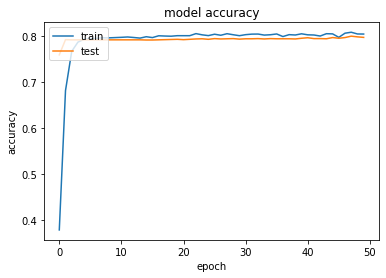

In [9]:
import matplotlib.pyplot as plt 
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [11]:
!pip install scikit-learn==0.21.2



In [12]:
from sklearn import metrics
print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))
#ACCURACY
print("Accuracy score",metrics.accuracy_score(y_test, y_pred))
#F1score 
print("F1_score",metrics.f1_score(y_test, y_pred, average='macro'))
#Precision  
print("precision_score",metrics.precision_score(y_test, y_pred))
#Recall
print("Recall_score",metrics.recall_score(y_test, y_pred))

#CONFUSION MATRIX
print(" Cofusion matrix score")
print(metrics.confusion_matrix(y_test, y_pred))

AUC: 0.513
Accuracy score 0.8075
F1_score 0.4734506284742856
precision_score 0.7857142857142857
Recall_score 0.027989821882951654
 Cofusion matrix score
[[1604    3]
 [ 382   11]]


In [0]:
#LETS DO HYPER METER TUNING 

In [0]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV



In [0]:
#To do cross-validation with keras we will use the wrappers for the Scikit-Learn API
#There are two wrappers available:
#keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_params), which implements the Scikit-Learn classifier interface,
#keras.wrappers.scikit_learn.KerasRegressor(build_fn=None, **sk_params), which implements the Scikit-Learn regressor interface.


In [15]:
#SOLUTION IS GRID  SEARCH 
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_shape=(x_train.shape[1],)))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=1)

layers = [[20], [10, 5], [15, 10, 5]]
#First try with single hidden layer with 20 neurons #2nd try 2 layers first with 40 neuron second with 20 neuron 
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3)

grid_result = grid.fit(x_train, y_train)



Epoch 1/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6878
Epoch 2/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7703
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7872
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7902
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7954
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7934
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7982
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7971
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7945
Epoch 10/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7986
Epoch 11/30
42/42 [

In [17]:
#print best parameters 
print("Best params obtained ",grid_result.best_params_)
print("Best score obtained ",grid_result.best_score_)

Best params obtained  {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [20]}
Best score obtained  0.8401249889209866


In [19]:

# Predicting the Test set results
y_pred = grid.predict(x_test)
y_pred = (y_pred > 0.5)


16/16 [==============================] - 0s 1ms/step


In [20]:
from sklearn import metrics
print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))
#ACCURACY
print("Accuracy score",metrics.accuracy_score(y_test, y_pred))
#F1score 
print("F1_score",metrics.f1_score(y_test, y_pred, average='macro'))
#Precision  
print("precision_score",metrics.precision_score(y_test, y_pred))
#Recall
print("Recall_score",metrics.recall_score(y_test, y_pred))

#CONFUSION MATRIX
print(" Cofusion matrix score")
print(metrics.confusion_matrix(y_test, y_pred))

AUC: 0.673
Accuracy score 0.855
F1_score 0.7092650219755542
precision_score 0.7696335078534031
Recall_score 0.37404580152671757
 Cofusion matrix score
[[1563   44]
 [ 246  147]]


In [0]:
#Saving Model
#Save Your Neural Network Model to JSON
#The Hierarchical Data Format (HDF5) is a data storage format for storing large
#arrays of data including values for the weights in a neural network.
#You can install HDF5 Python module: pip install h5py
#Keras gives you the ability to describe and save any model using the JSON format.

In [22]:
!pip install h5py

In [0]:
#h5 file stores model and architecture together

#Saving model 
classifier.save("/content/drive/My Drive/Colab Notebooks/BINARY_CLF_ANN.h5")
#Reading model
from tensorflow.python.keras.models import load_model 
# load model
loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/BINARY_CLF_ANN.h5")


In [0]:
# Predicting the Test set results
y_pred = loaded_model.predict(x_test)
y_pred = (y_pred > 0.5)


In [42]:
from sklearn import metrics
print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))
#ACCURACY
print("Accuracy score",metrics.accuracy_score(y_test, y_pred))
#F1score 
print("F1_score",metrics.f1_score(y_test, y_pred, average='macro'))
#Precision  
print("precision_score",metrics.precision_score(y_test, y_pred))
#Recall
print("Recall_score",metrics.recall_score(y_test, y_pred))

#CONFUSION MATRIX
print(" Cofusion matrix score")
print(metrics.confusion_matrix(y_test, y_pred))

AUC: 0.513
Accuracy score 0.8075
F1_score 0.4734506284742856
precision_score 0.7857142857142857
Recall_score 0.027989821882951654
 Cofusion matrix score
[[1604    3]
 [ 382   11]]


In [0]:
#Same as model trained earlier 